<a href="https://colab.research.google.com/github/pHarisairamreddy18/PREDICTIVE-ANALYSIS-USING-MACHINE-LEARNING/blob/main/heart_disease_predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here
# Create Kaggle directory and move json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d cherngs/heart-disease-cleveland-uci
!unzip -o heart-disease-cleveland-uci.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
License(s): reddit-api
  0% 0.00/3.33k [00:00<?, ?B/s]
100% 3.33k/3.33k [00:00<00:00, 14.1MB/s]
Archive:  heart-disease-cleveland-uci.zip
  inflating: heart_cleveland_upload.csv  


In [ ]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Step 2: Load Dataset
heart_data = pd.read_csv("heart_cleveland_upload.csv")

# Display first few rows
print("Dataset Sample:")
display(heart_data.head())

Dataset Sample:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None

Missing Values per Column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      

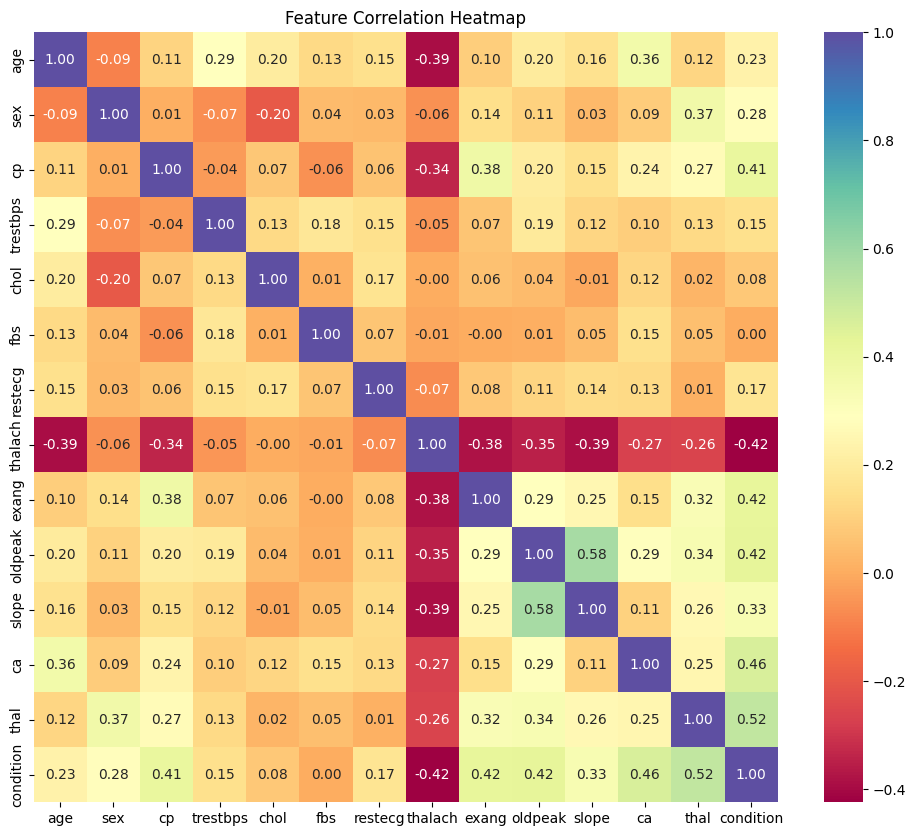


Target Variable Distribution:
condition
0    160
1    137
Name: count, dtype: int64


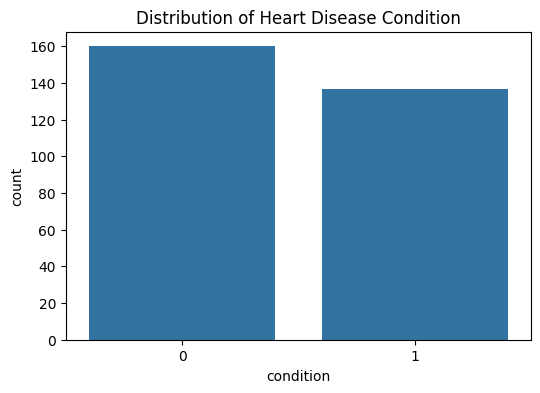

In [ ]:
# Step 3: Data Exploration and Feature Selection

# Basic info
print("\nDataset Information:")
print(heart_data.info())

# Check for missing values
print("\nMissing Values per Column:")
print(heart_data.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(heart_data.describe())

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.title("Feature Correlation Heatmap")
plt.show()

# Target variable distribution
print("\nTarget Variable Distribution:")
print(heart_data['condition'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='condition', data=heart_data)
plt.title("Distribution of Heart Disease Condition")
plt.show()

In [ ]:
# Step 4: Data Preprocessing

# Separate features and target
X = heart_data.drop('condition', axis=1).values
y = heart_data['condition'].values

# Split dataset into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 5: Model Training

# Random Forest Classifier with tuned hyperparameters
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)

clf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, n_estimators=300, random_state=42)


Model Accuracy: 85.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        40
           1       0.93      0.74      0.83        35

    accuracy                           0.85        75
   macro avg       0.87      0.85      0.85        75
weighted avg       0.86      0.85      0.85        75



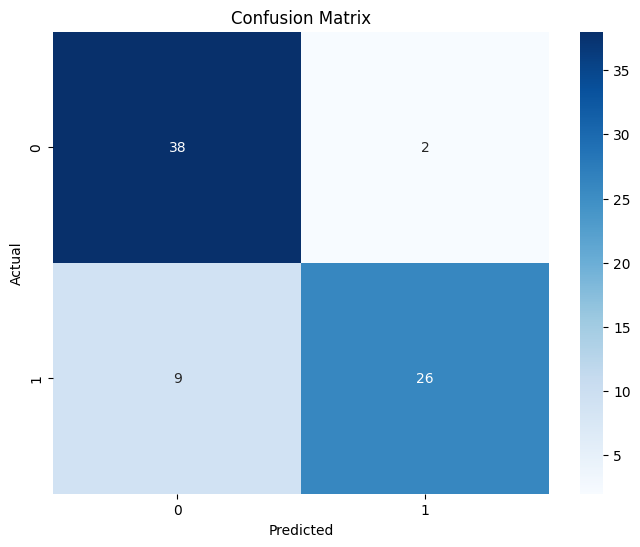

In [ ]:
# Step 6: Model Evaluation

# Predict on test data
y_pred = clf.predict(X_test_scaled)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()